In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from datetime import date
import hisepy
import numpy as np
import os
import pandas as pd
import re
import scanpy as sc

## Helper functions

In [2]:
def cache_uuid_path(uuid):
    cache_path = '/home/jupyter/cache/{u}'.format(u = uuid)
    if not os.path.isdir(cache_path):
        hise_res = hisepy.reader.cache_files([uuid])
    filename = os.listdir(cache_path)[0]
    cache_file = '{p}/{f}'.format(p = cache_path, f = filename)
    return cache_file

In [3]:
def read_csv_uuid(uuid):
    cache_file = cache_uuid_path(uuid)
    res = pd.read_csv(cache_file)
    return res

In [4]:
def read_parquet_uuid(uuid):
    cache_file = cache_uuid_path(uuid)
    res = pd.read_parquet(cache_file)
    return res

In [5]:
def read_adata_uuid(uuid):
    cache_file = cache_uuid_path(uuid)
    res = sc.read_h5ad(cache_file)
    return res

In [6]:
def backed_adata_uuid(uuid):
    cache_file = cache_uuid_path(uuid)
    res = sc.read_h5ad(cache_file, backed = 'r')
    return res

In [7]:
def rm_cache_uuid(uuid):
    cache_path = '/home/jupyter/cache/{u}'.format(u = uuid)
    rm_call = 'rm -r {d}'.format(d = cache_path)
    os.system(rm_call)

In [8]:
def format_cell_type(cell_type):
    cell_type = re.sub('\\+', 'pos', cell_type)
    cell_type = re.sub('-', 'neg', cell_type)
    cell_type = re.sub(' ', '_', cell_type)
    return cell_type

In [9]:
def filename_cell_type(filename):
    cell_type = re.sub('.+L3_','',filename)
    cell_type = re.sub('_2024.+','',cell_type)
    cell_type = re.sub('_', ' ', cell_type)
    cell_type = re.sub('pos','+', cell_type)
    cell_type = re.sub('neg','-', cell_type)
    return cell_type

In [10]:
def element_id(n = 3):
    import periodictable
    from random import randrange
    rand_el = []
    for i in range(n):
        el = randrange(0,118)
        rand_el.append(periodictable.elements[el].name)
    rand_str = '-'.join(rand_el)
    return rand_str

## Markers for dotplots

In [30]:
broad_markers = [
    'CD3D', # T cells
    'CD3E', # T cells/NK
    'FCN1', # Monocytes/Myeloid
    'HBB', # Erythrocytes
    'IL7R', # T cells
    'MS4A1', # B cells
    'CD79A', # B cells
    'PPBP', # Platelets
    'IFI44L' # ISG-high
]

In [26]:
class_markers = [
    'FCGR3A', # CD16+ cells
    'GZMB',
    'GZMK',   # GZMK+ (between CD56hi and CD56dim)
    'IFI44L', # ISG-high
    'NCAM1',  # CD56
    'PTMS'    # Some adaptive NK
]

## Read cell type hierarchy

In [13]:
hierarchy_uuid = '1a44252c-8cab-4c8f-92c9-d8f3af633790'
hierarchy_df = read_csv_uuid(hierarchy_uuid)

## Identify files for use in HISE

In [14]:
search_id = 'californium-tin-oxygen'

Retrieve files stored in our HISE project store

In [15]:
ps_df = hisepy.list_files_in_project_store('cohorts')
ps_df = ps_df[['id', 'name']]

Filter for files from the previous notebook using our search_id

In [16]:
search_df = ps_df[ps_df['name'].str.contains(search_id)]
search_df = search_df.sort_values('name')
search_df['AIFI_L3'] = [filename_cell_type(f) for f in search_df['name']]

In [17]:
search_df['AIFI_L3'].tolist()

['Adaptive NK cell',
 'CD56bright NK cell',
 'GZMK- CD56dim NK cell',
 'GZMK+ CD56dim NK cell',
 'ILC',
 'ISG+ CD56dim NK cell',
 'Proliferating NK cell']

## Review Adaptive NK cell

In [18]:
cell_type = 'Adaptive NK cell'
type_uuid = search_df['id'].loc[search_df['AIFI_L3'] == cell_type].tolist()[0]

In [19]:
type_uuid

'68091bf3-85b6-4ed4-80b2-601646da6533'

In [20]:
adata = read_adata_uuid(type_uuid)

downloading fileID: 68091bf3-85b6-4ed4-80b2-601646da6533
Files have been successfully downloaded!


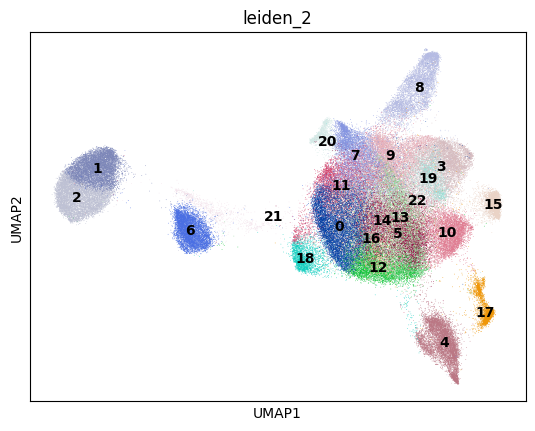

In [21]:
sc.pl.umap(adata, color = 'leiden_2', legend_loc = 'on data')

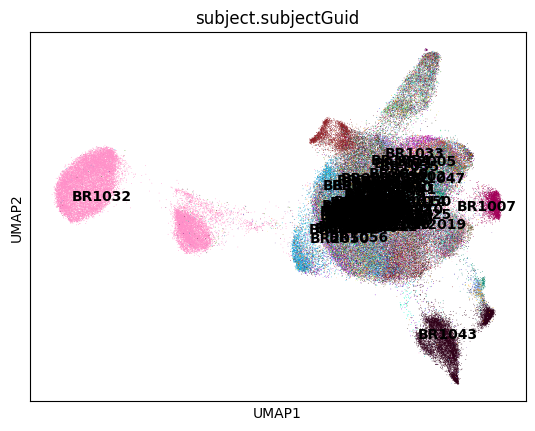

In [25]:
sc.pl.umap(adata, color = 'subject.subjectGuid', legend_loc = 'on data')

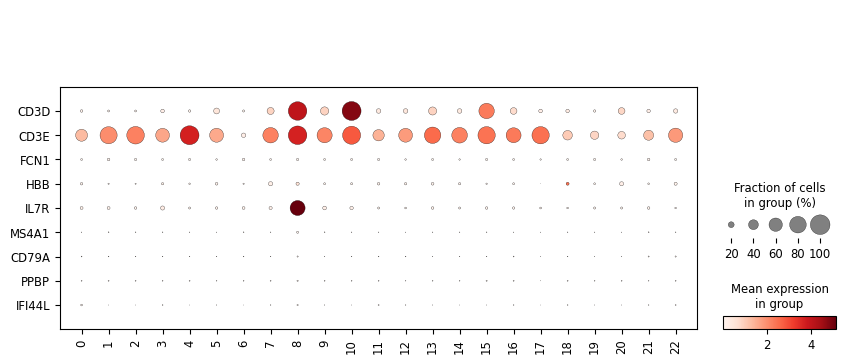

In [31]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = broad_markers, swap_axes = True)

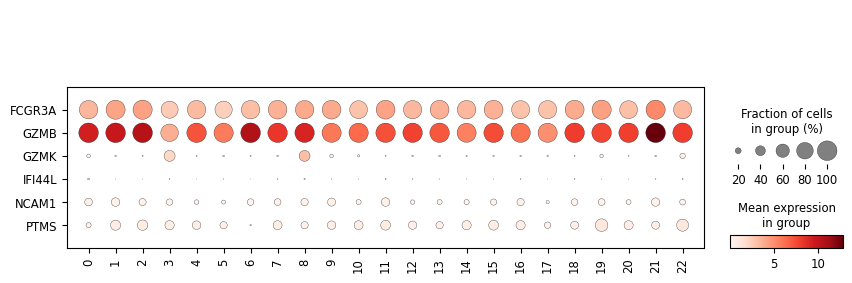

In [27]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = class_markers, swap_axes = True)

In [32]:
adata.obs['leiden_2'].value_counts()

leiden_2
0     8829
1     7838
2     7823
3     7425
4     7235
5     6558
6     6320
7     5931
8     5768
9     5615
10    5565
11    5029
12    4643
13    3888
14    3798
15    3142
16    3127
17    2983
18    2549
19    2428
20    2067
21    1777
22     165
Name: count, dtype: int64

## Review CD56bright NK cell

In [34]:
cell_type = 'CD56bright NK cell'
type_uuid = search_df['id'].loc[search_df['AIFI_L3'] == cell_type].tolist()[0]

In [35]:
type_uuid

'8c5b3911-2727-4396-8332-765e0794ee50'

In [36]:
adata = read_adata_uuid(type_uuid)

downloading fileID: 8c5b3911-2727-4396-8332-765e0794ee50
Files have been successfully downloaded!


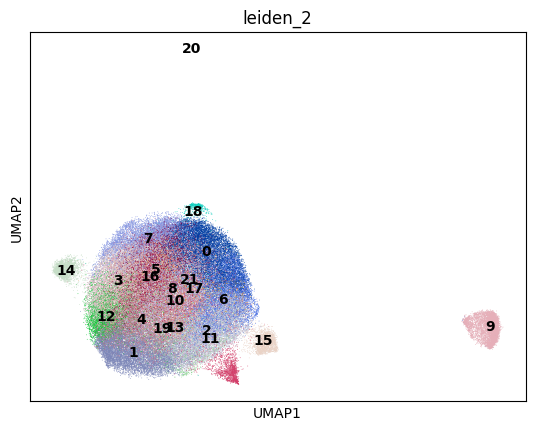

In [37]:
sc.pl.umap(adata, color = 'leiden_2', legend_loc = 'on data')

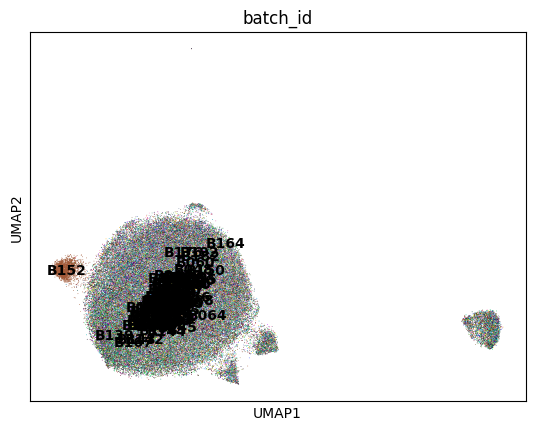

In [41]:
sc.pl.umap(adata, color = 'batch_id', legend_loc = 'on data')

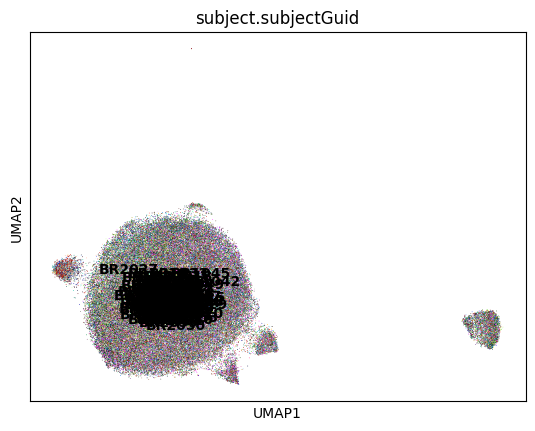

In [42]:
sc.pl.umap(adata, color = 'subject.subjectGuid', legend_loc = 'on data')

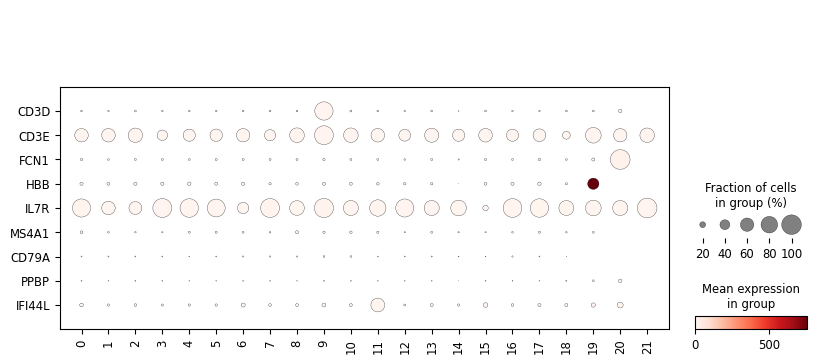

In [38]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = broad_markers, swap_axes = True)

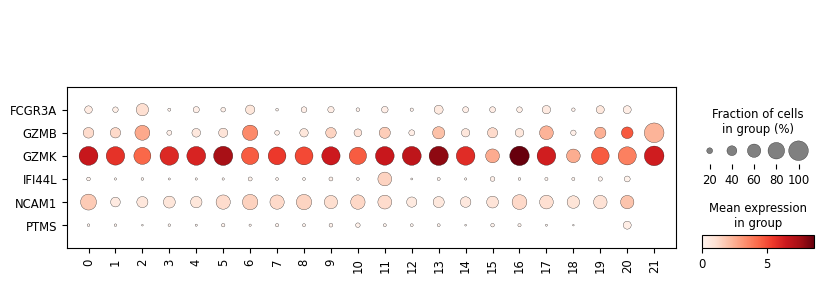

In [39]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = class_markers, swap_axes = True)

In [40]:
adata.obs['leiden_2'].value_counts()

leiden_2
0     9109
1     9003
2     8100
3     7592
4     6763
5     6603
6     6544
7     6019
8     5847
9     5079
10    4237
11    3410
12    3362
13    2775
14    2692
15    2532
16    2163
17    1361
18     652
19      23
20      10
21       3
Name: count, dtype: int64

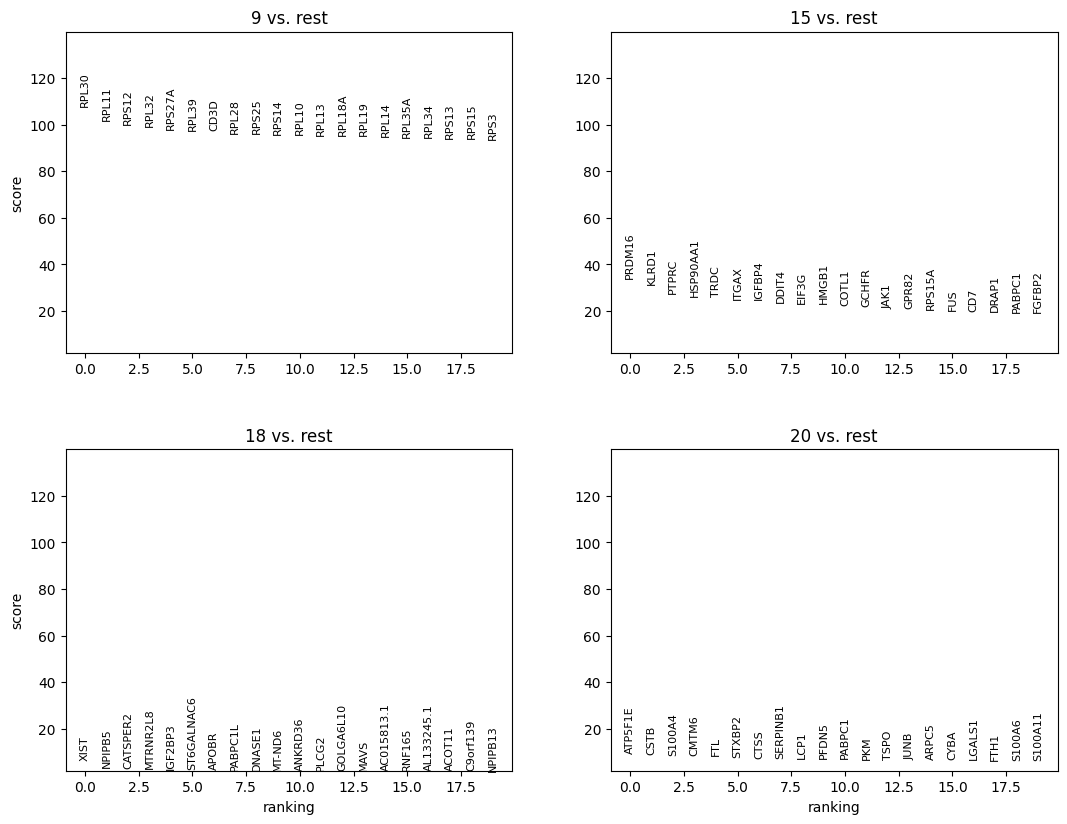

In [43]:
sc.tl.rank_genes_groups(
    adata, 
    groupby = 'leiden_2', 
    groups = ['9','15','18','20']
)
sc.pl.rank_genes_groups(adata, ncols = 2)

## Review GZMK- CD56dim NK cell

In [44]:
cell_type = 'GZMK- CD56dim NK cell'
type_uuid = search_df['id'].loc[search_df['AIFI_L3'] == cell_type].tolist()[0]

In [45]:
type_uuid

'c57b1fec-d3d6-447c-8ae1-ca38be463007'

In [46]:
adata = read_adata_uuid(type_uuid)

downloading fileID: c57b1fec-d3d6-447c-8ae1-ca38be463007
Files have been successfully downloaded!


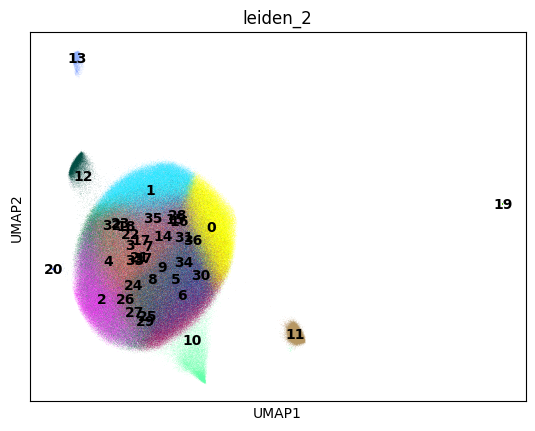

In [47]:
sc.pl.umap(adata, color = 'leiden_2', legend_loc = 'on data')

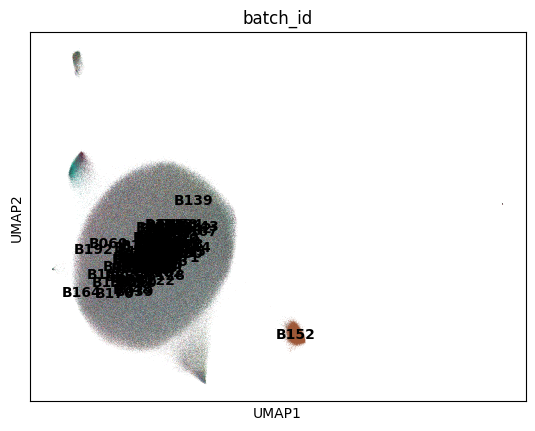

In [51]:
sc.pl.umap(adata, color = 'batch_id', legend_loc = 'on data')

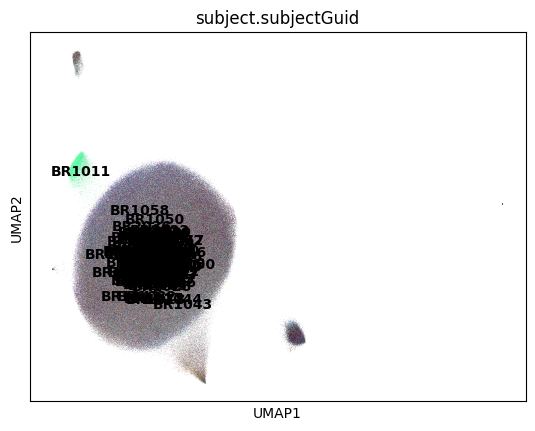

In [52]:
sc.pl.umap(adata, color = 'subject.subjectGuid', legend_loc = 'on data')

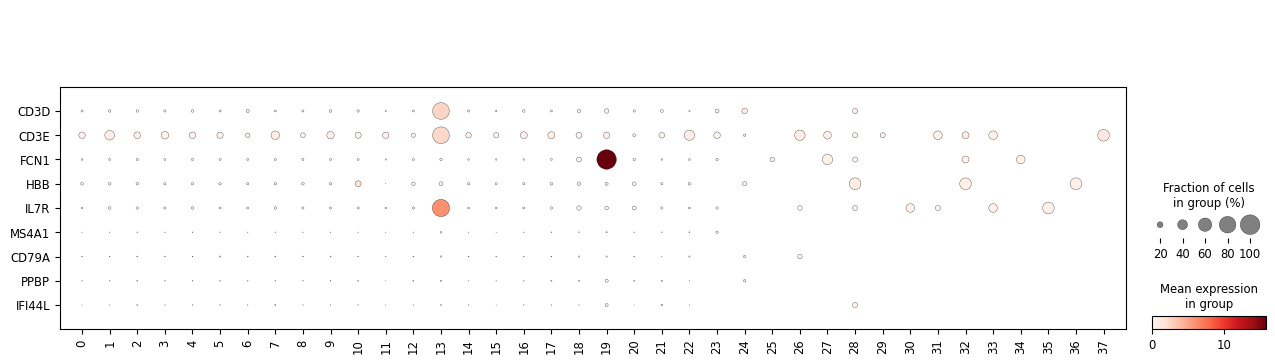

In [49]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = broad_markers, swap_axes = True)

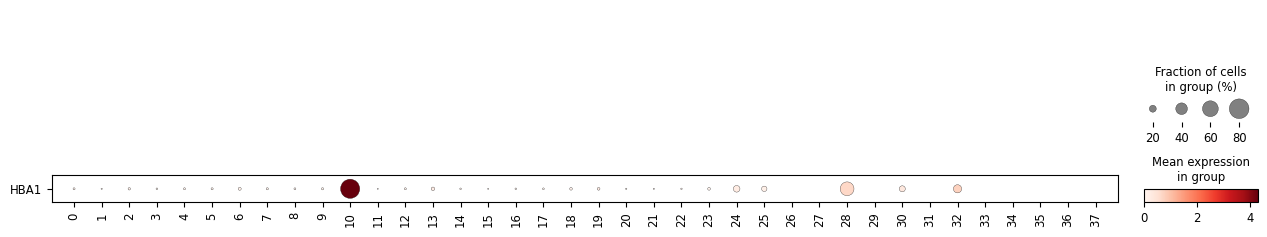

In [54]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = ['HBA1'], swap_axes = True)

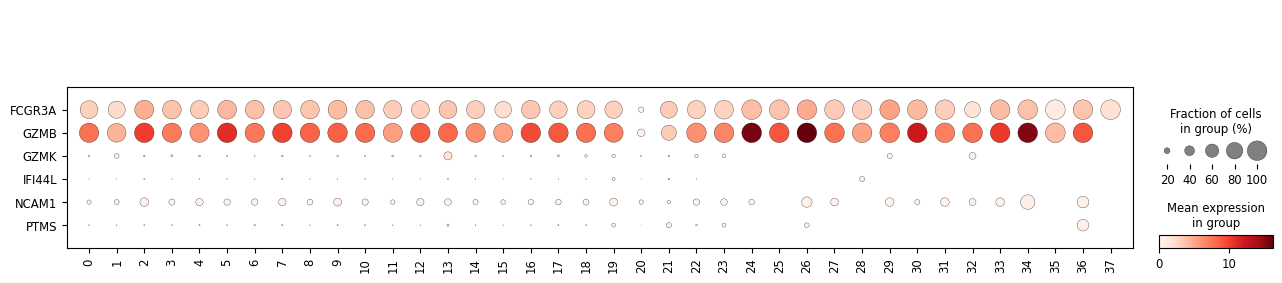

In [50]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = class_markers, swap_axes = True)

In [45]:
adata.obs['leiden_2'].value_counts()

leiden_2
0     3500
1     3301
2     3073
3     3018
4     2966
5     2679
6     2667
7     2277
8     2277
9     2250
10    1924
11    1918
12    1830
13    1610
14    1557
15    1554
16     892
17     586
18     389
19     336
20     139
Name: count, dtype: int64

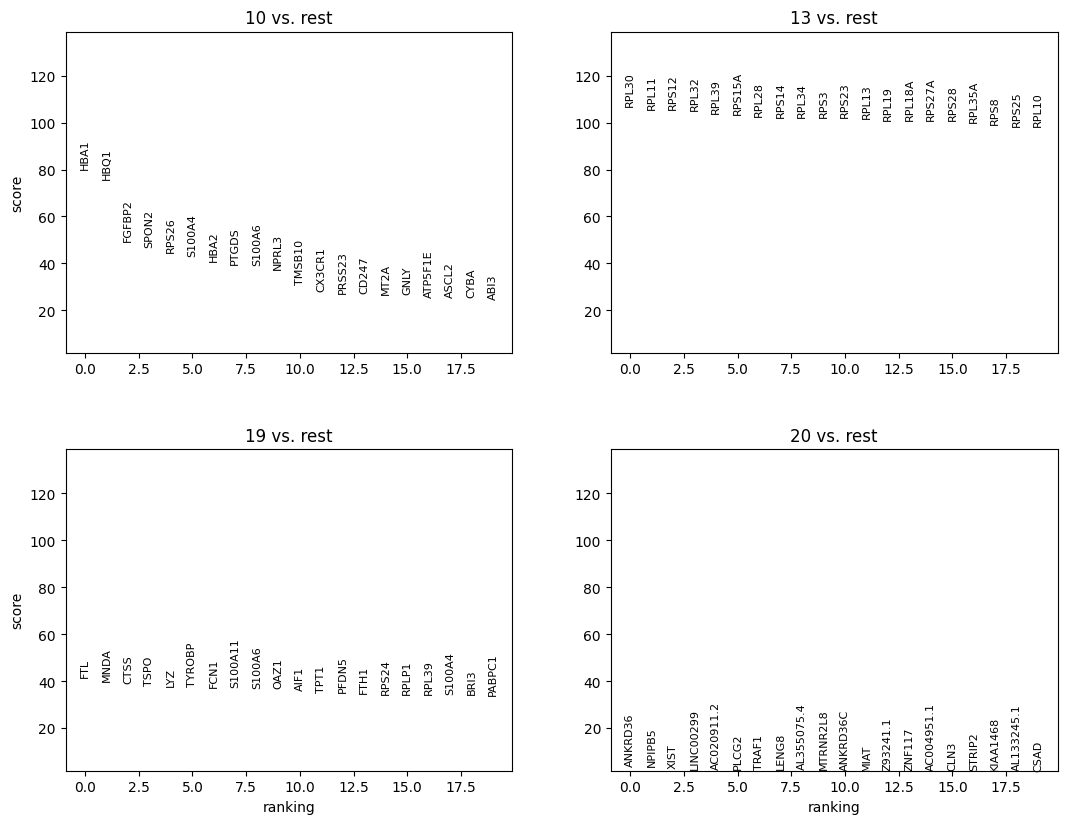

In [56]:
sc.tl.rank_genes_groups(
    adata, 
    groupby = 'leiden_2', 
    groups = ['10','13','19','20']
)
sc.pl.rank_genes_groups(adata, ncols = 2)

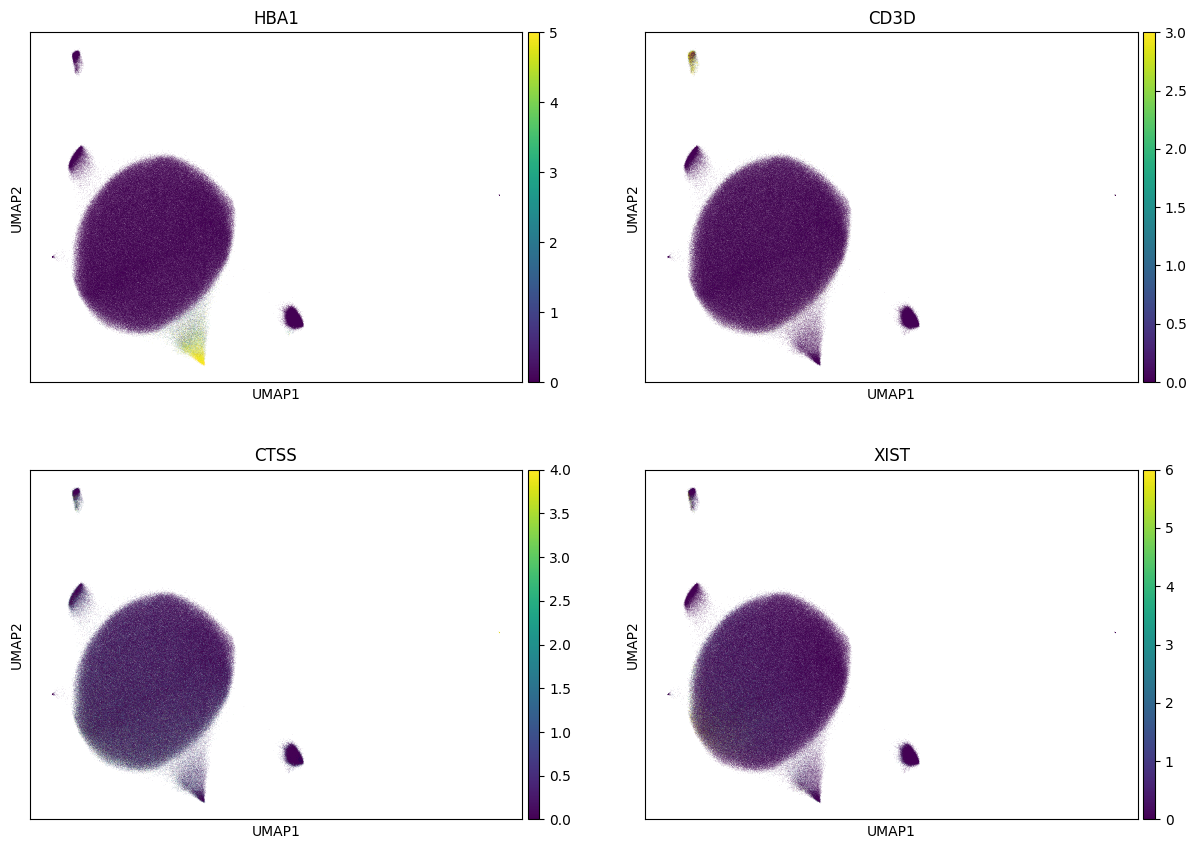

In [58]:
sc.pl.umap(adata, color = ['HBA1','CD3D','CTSS','XIST'], ncols = 2, vmax = 'p99')

## Review ISG+ CD56dim NK cell

In [59]:
cell_type = 'ISG+ CD56dim NK cell'
type_uuid = search_df['id'].loc[search_df['AIFI_L3'] == cell_type].tolist()[0]

In [60]:
type_uuid

'94ac7c14-a07c-43a1-a22b-dbc5df49aaa8'

In [61]:
adata = read_adata_uuid(type_uuid)

downloading fileID: 94ac7c14-a07c-43a1-a22b-dbc5df49aaa8
Files have been successfully downloaded!


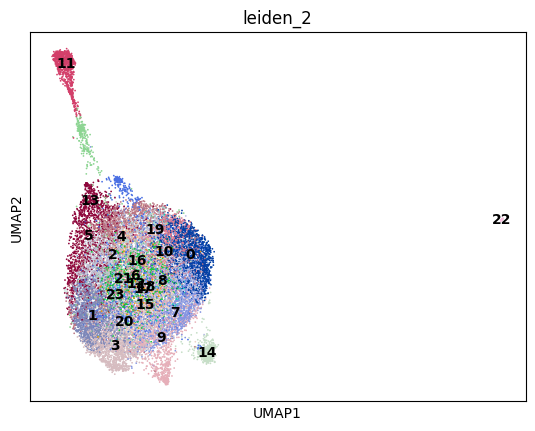

In [62]:
sc.pl.umap(adata, color = 'leiden_2', legend_loc = 'on data')

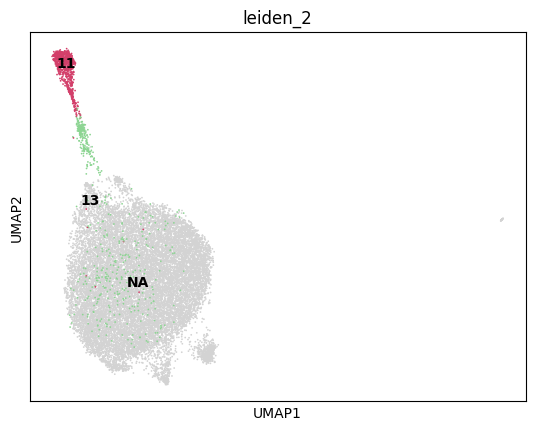

In [68]:
sc.pl.umap(adata, color = 'leiden_2', legend_loc = 'on data', groups = ['11','13'])

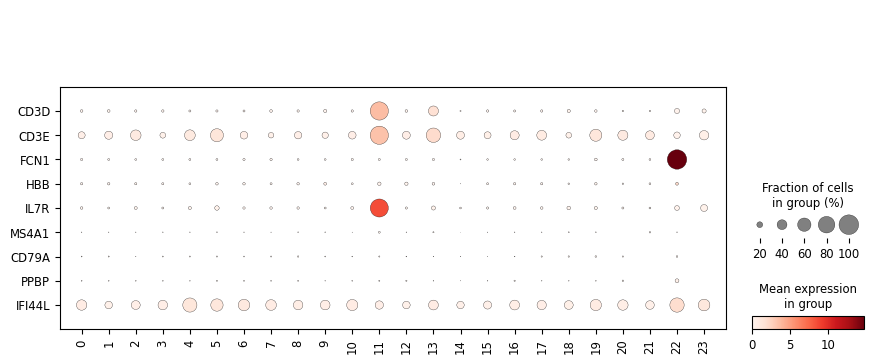

In [63]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = broad_markers, swap_axes = True)

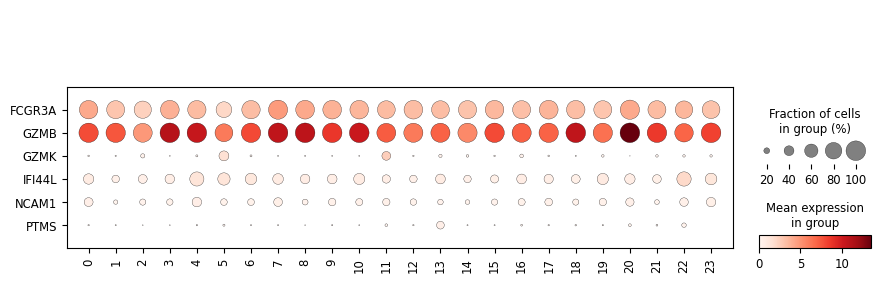

In [64]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = class_markers, swap_axes = True)

In [65]:
adata.obs['leiden_2'].value_counts()

leiden_2
0     1706
1     1556
2     1548
3     1418
4     1383
5     1374
6     1238
7     1223
8     1118
9     1076
10     976
11     895
12     761
13     580
14     572
15     531
16     464
17     189
18     168
19     136
20     119
21      92
22      78
23      16
Name: count, dtype: int64

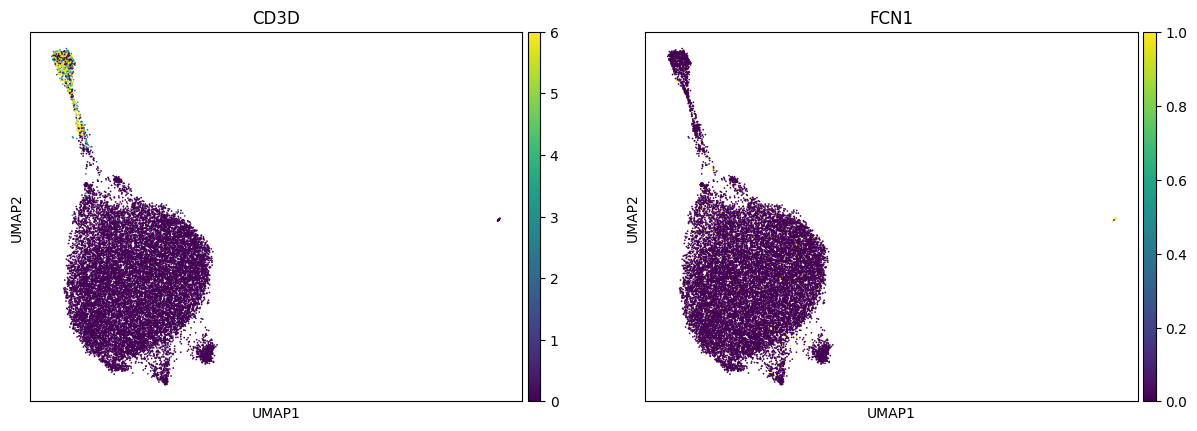

In [67]:
sc.pl.umap(adata, color = ['CD3D','FCN1'], vmax = 'p99')

## Review Proliferating NK cell

In [69]:
cell_type = 'Proliferating NK cell'
type_uuid = search_df['id'].loc[search_df['AIFI_L3'] == cell_type].tolist()[0]

In [70]:
type_uuid

'4a9774c4-2141-4910-b13a-aec201b962b2'

In [71]:
adata = read_adata_uuid(type_uuid)

downloading fileID: 4a9774c4-2141-4910-b13a-aec201b962b2
Files have been successfully downloaded!


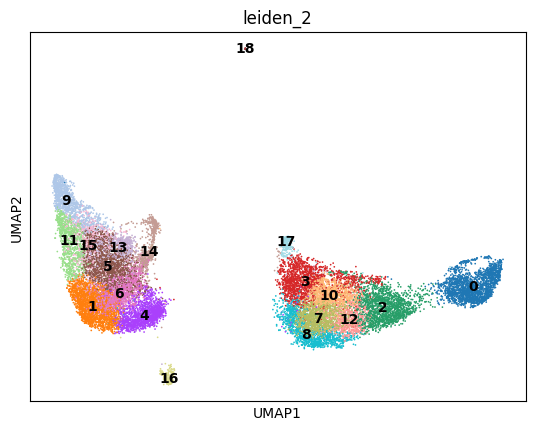

In [72]:
sc.pl.umap(adata, color = 'leiden_2', legend_loc = 'on data')

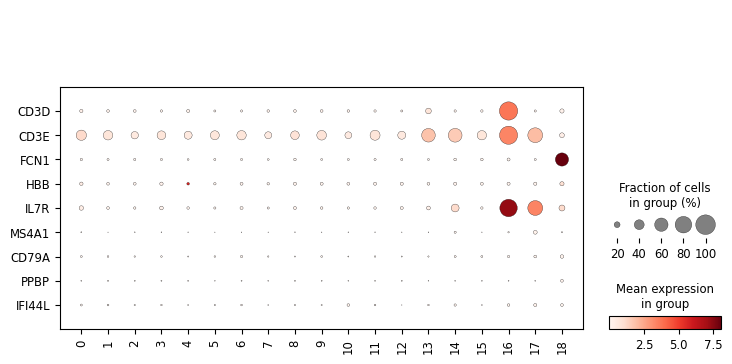

In [73]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = broad_markers, swap_axes = True)

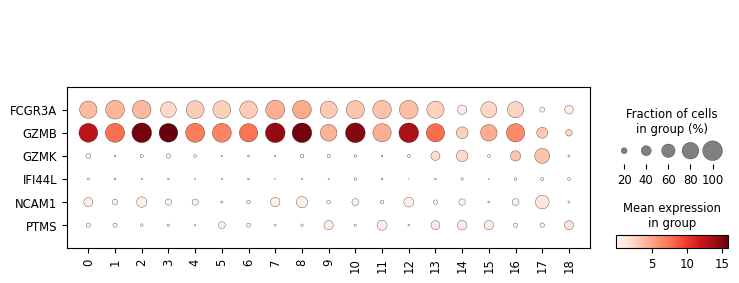

In [74]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = class_markers, swap_axes = True)

In [76]:
adata.obs['leiden_2'].value_counts()

leiden_2
0     2079
1     1822
2     1660
3     1572
4     1461
5     1424
6     1278
7     1176
8     1119
9     1065
10    1033
11     903
12     692
13     676
14     618
15     598
16     292
17     281
18      39
Name: count, dtype: int64

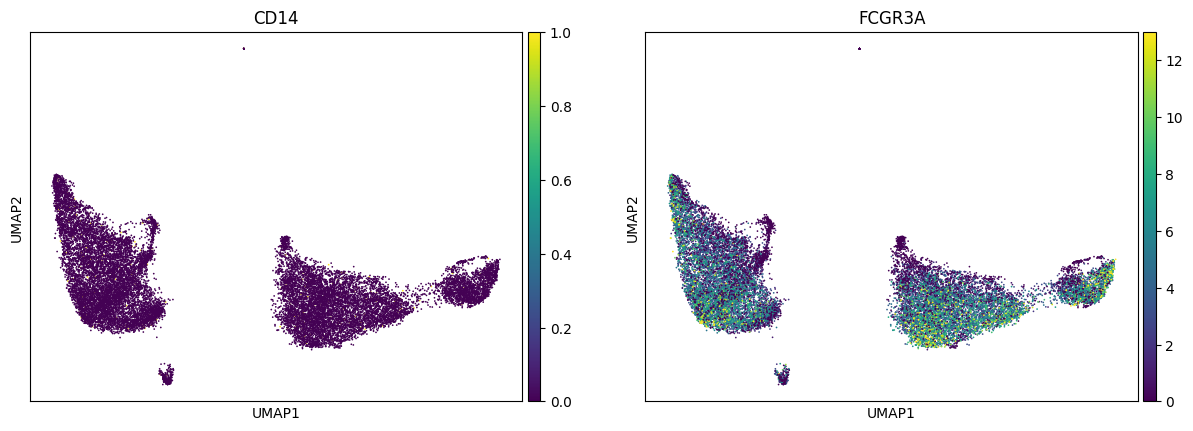

In [79]:
sc.pl.umap(adata, color = ['CD14','FCGR3A'], vmax = 'p99')

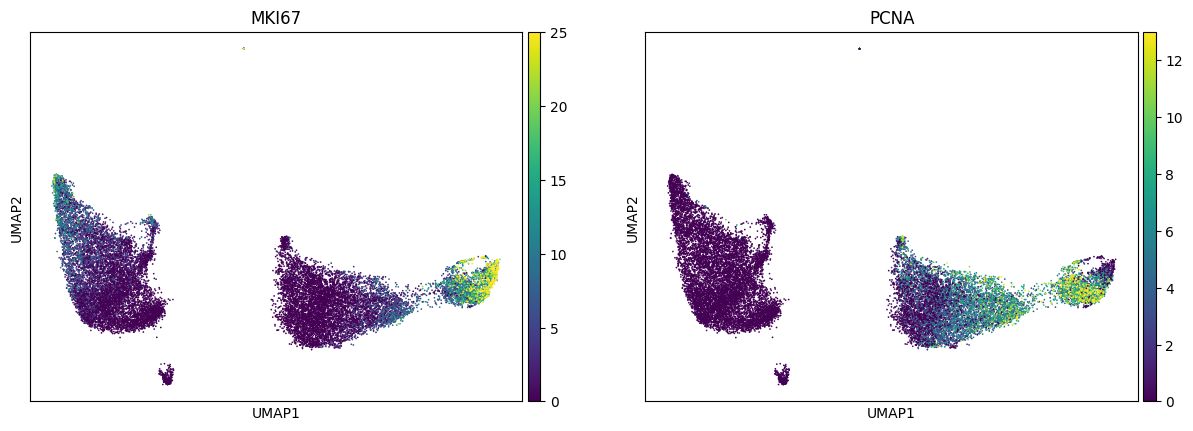

In [77]:
sc.pl.umap(adata, color = ['MKI67','PCNA'], vmax = 'p99')

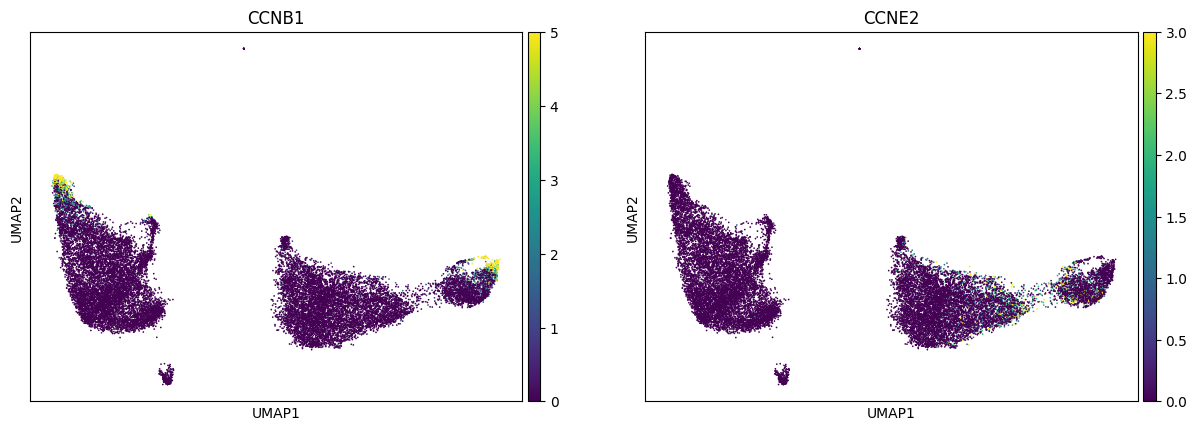

In [78]:
sc.pl.umap(adata, color = ['CCNB1','CCNE2'], vmax = 'p99')

## Review ILC

In [80]:
cell_type = 'ILC'
type_uuid = search_df['id'].loc[search_df['AIFI_L3'] == cell_type].tolist()[0]

In [81]:
type_uuid

'00200b26-5172-48dc-8641-3c9749b4d338'

In [82]:
adata = read_adata_uuid(type_uuid)

downloading fileID: 00200b26-5172-48dc-8641-3c9749b4d338
Files have been successfully downloaded!


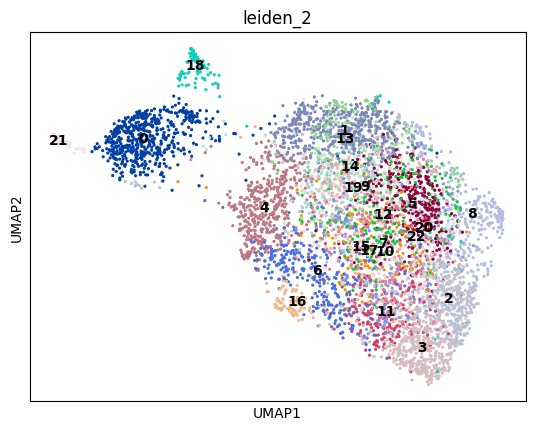

In [83]:
sc.pl.umap(adata, color = 'leiden_2', legend_loc = 'on data')

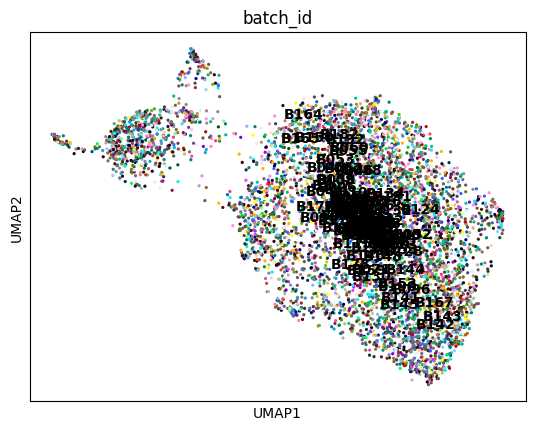

In [84]:
sc.pl.umap(adata, color = 'batch_id', legend_loc = 'on data')

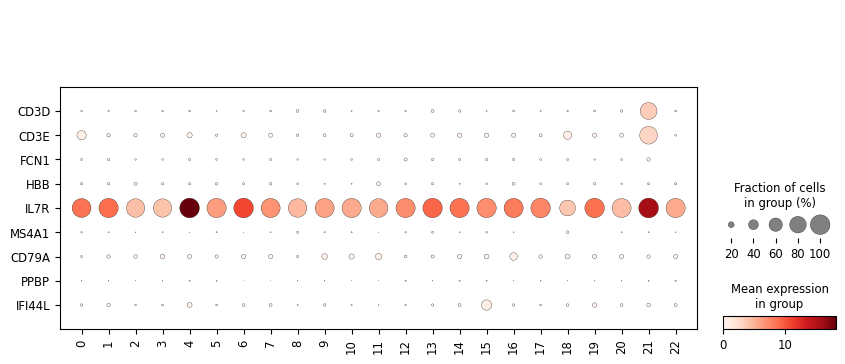

In [85]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = broad_markers, swap_axes = True)

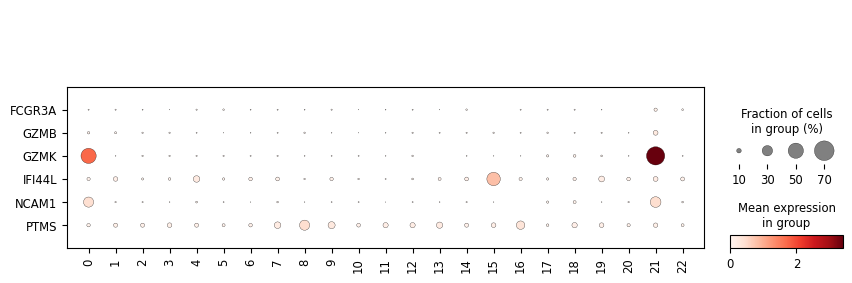

In [86]:
sc.pl.dotplot(adata, groupby = 'leiden_2', var_names = class_markers, swap_axes = True)

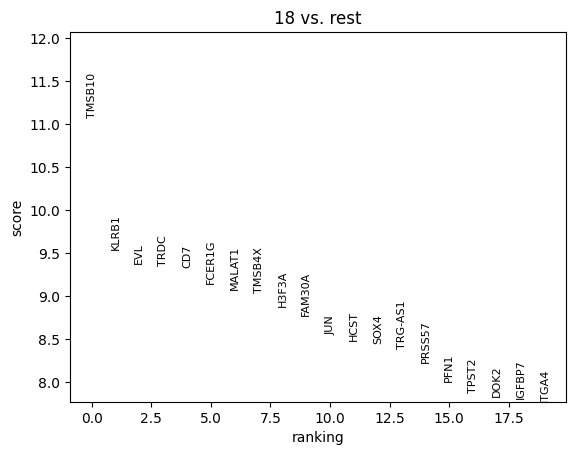

In [87]:
sc.tl.rank_genes_groups(
    adata, 
    groupby = 'leiden_2', 
    groups = ['18']
)
sc.pl.rank_genes_groups(adata, ncols = 2)

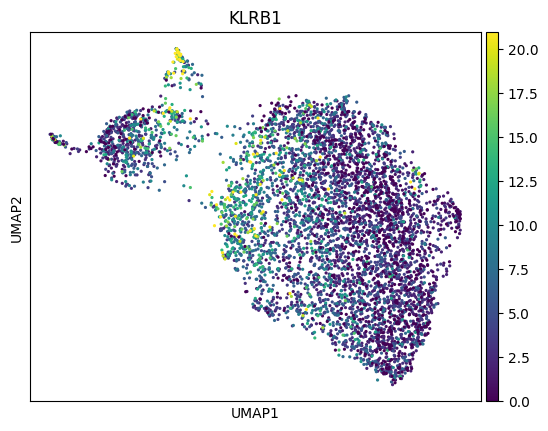

In [88]:
sc.pl.umap(adata, color = ['KLRB1'], vmax = 'p99')